<a href="https://colab.research.google.com/github/imiled/DL_Tools_For_Finance/blob/master/01_dimensionality_reduction_pca_colab_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Selection using PCA


In [5]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']

In [8]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
FEATURES = list(boston_df.columns[:-1])

FEATURES


['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [10]:
len(FEATURES)

13

## Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [11]:
from sklearn.decomposition import PCA

def apply_pca(X, n):
    pca= PCA(n_components=n)
    x_new=pca.fit_transform(X) #not a datafram
    return pca, pd.DataFrame(x_new) #retransformation en dataframe

In [13]:
# , _ los demas resultados no vamos a guardarlos
pca, df_pca = apply_pca(boston_df[FEATURES], len(FEATURES))

In [14]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08]


In [15]:
sum(pca.explained_variance_ratio_)

1.0

In [16]:
pca, df_pca = apply_pca(boston_df[FEATURES], 2)
print("Explained Variance:", pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

Explained Variance: [0.80582318 0.16305197]


0.9688751429772742

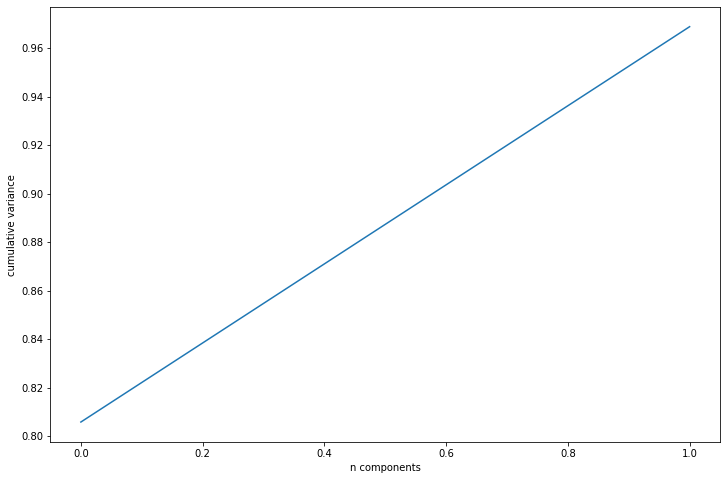

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');


## Build model

In [1]:
def build_model(regression_fn,
target, features, dataset, n):

    X = dataset[features]
    Y = dataset[target]
 
    _ , X_new = apply_pca(X, n)
 
    x_train, x_test, y_train, y_test=train_test_split(X_new,Y,test_size=0.2)
    #quel est la difference en prenant X au lieu de X_new e 
    model= regression_fn(x_train, y_train)
 
    y_pred=model.predict(x_test)
 
    return {
        'x_initial' : X,
        'x_transform': X_new,
        'x_train' : x_train,
        'x_test'  : x_test, 
        'y_train' : y_train,
        'y_test'  : y_test,
        'y_pred'  : y_pred,
        'model'   : model
       }     

In [3]:
def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    model_fitted=model.fit(x_train,y_train)
    return model

## Sklearn Model

In [18]:
model_params = {}

In [19]:
model_params['sklearn_reg'] = build_model(regression_fn=linear_reg,
                                          target='TARGET',
                                          features=FEATURES,
                                          dataset=boston_df,
                                          n=3)

In [20]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [21]:
x_transform.shape

(506, 3)

In [22]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3577665568771847
Testing score:  0.039841119598946206


## Iris Classification ML

In [23]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris =load_iris()
X=iris.data
Y=iris.target
target_names= iris.target_names

X_scaled=MinMaxScaler().fit_transform(X)



In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X_scaled

In [38]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### brouillon

In [42]:
len(Y)

150

In [43]:
len(X_scaled)

150

In [49]:
np.size(Y)

150

In [54]:
X_scaled[1][1]

0.41666666666666674

In [55]:
Y[1]

0

In [53]:
np.multiply(X_scaled,Y)

ValueError: ignored

In [56]:
import pandas as pd


In [ ]:
pd.DataFrame.append(pd.DataFrame(X,columns=['a','b','c','d']),pd.DataFrame(Y,columns=['t']))

In [63]:
irisdataset = np.zeros((150,5))
irisdataset[:,:-1] = X_scaled
irisdataset[:,-1] = Y

In [65]:
listfeature=['sl','sw','pl','pw','Name']
irisdataset=pd.DataFrame(irisdataset,columns=listfeature)
             

In [ ]:
irisdataset

## Retour

In [68]:
model_params['sklearn_reg'] = build_model(regression_fn=linear_reg,
                                          target=listfeature[-1],
                                          features=listfeature[:-1],
                                          dataset=irisdataset,
                                          n=1)

Exercice montrar que un autoencoder linearles igual que un PCA 

In [69]:
def plot_clusters(X,y, title='PCA'):
    plt.figure()
    colors=['red','blue','green']
    lw=2

    for color, i, target_name in zip(colors,[0,1,2], target_names):
      plt.scatter(X.loc[y==i,0],X.loc[y==i,1],color=color, label=target_name)
    plt.title(title)
    plt.show()


In [70]:
_, df_pca=apply_pca(X_scaled, 2)

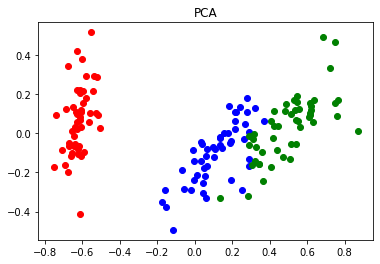

In [71]:
plot_clusters(df_pca,Y,'PCA')

Let s build a linear Autoencoder with one hidden Layer (ending + hidden layer + encoding
*use a linear activation for encoding decoding laer
the hidden layer shall have 2 neurol=n


In [73]:
#Dense capa oculta solo 1
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def autoencoder_builder(X, activation='linear', encoding_dim=2):
  # this is the size of our encoded representations       
  input_dim= X.shape[1]
  output_dim=input_dim
  input_img=Input(shape=(input_dim,))
    
  encoded=Dense(units=encoding_dim,activation=activation)(input_img)
  decoded=Dense(units=output_dim,activation=activation)(encoded)

  autoencoder=Model(input_img,decoded)
  autoencoder.summary()
  autoencoder.compile(optimizer='rmsprop',loss='mse')
  print(autoencoder.summary())
  history=autoencoder.fit(x=X, y=X, batch_size=50,epochs=500,shuffle=True)
  plt.plot(history.history['loss'])
  plt.show()
  
  encoder_model =Model(input_img, encoded)
  return encoder_model.predict(X)

In [ ]:
linear_output=autoencoder_builder(X_scaled)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
____________________________________

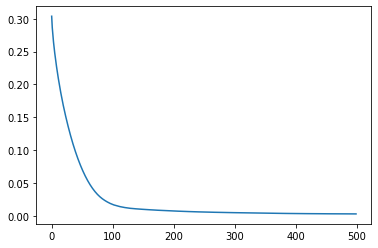

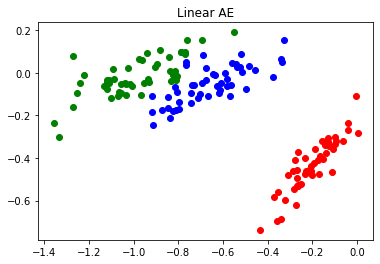

In [76]:

linear_output=autoencoder_builder(X_scaled)
plot_clusters(pd.DataFrame(linear_output),Y, 'Linear AE')

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
__________________________________

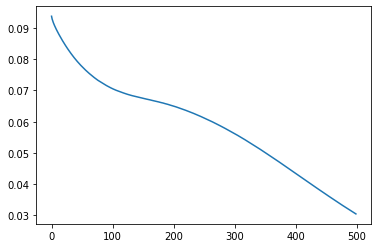

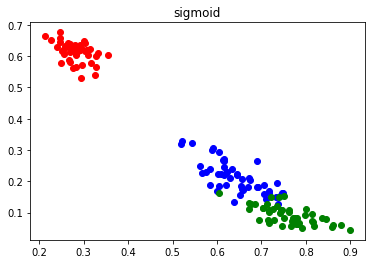

In [77]:
linear_output=autoencoder_builder(X_scaled,activation='sigmoid')
plot_clusters(pd.DataFrame(linear_output),Y, 'sigmoid')

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
__________________________________

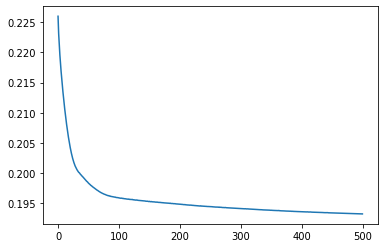

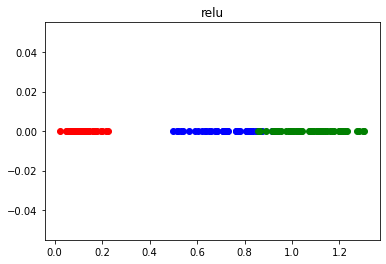

In [78]:
linear_output=autoencoder_builder(X_scaled,activation='relu')
plot_clusters(pd.DataFrame(linear_output),Y, 'relu')